<a href="https://colab.research.google.com/github/NguyenAnhKietUIT/IS254.O11/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import numpy as np
import pandas as pd

#Import datasets

##Rating

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Data/BX-Book-Ratings.csv', delimiter=";", encoding="latin1")
ratings.columns = ['userId', 'ISBN', 'bookRating']
ratings

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


##User

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/Data/BX-Users.csv', delimiter=";", encoding="latin1")
users.columns = ['userId', 'location', 'age']
users

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


##Book

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/Data/BX-Books.csv', delimiter=";", encoding="latin-1", on_bad_lines="skip", low_memory=False)
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageURLS,imageURLM,imageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


##Shape

In [ ]:
print("ratings.shape:", ratings.shape)
print("users.shape:", users.shape)
print("books.shape:", books.shape)

ratings.shape: (1149780, 3)
users.shape: (278858, 3)
books.shape: (271360, 8)


#Data Preprocessing

In [ ]:
books.drop(['imageURLS','imageURLM','imageURLL'], axis=1, inplace=True)
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
ratings.dtypes

userId         int64
ISBN          object
bookRating     int64
dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
ratings['bookRating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
users.dtypes

userId        int64
location     object
age         float64
dtype: object

In [ ]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [ ]:
books.yearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [ ]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"

In [ ]:
books.loc[books.ISBN == '0789466953', 'yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"

In [ ]:
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'

In [ ]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication)

In [ ]:
sorted(books['yearOfPublication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [ ]:
books.loc[books.yearOfPublication == 0,:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [ ]:
books.loc[books.yearOfPublication == 1376,:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz


In [ ]:
rating_book = pd.merge(ratings, books, on='ISBN')
rating_book

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [ ]:
all_ratings = pd.merge(rating_book, users, on='userId')
all_ratings

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


#Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

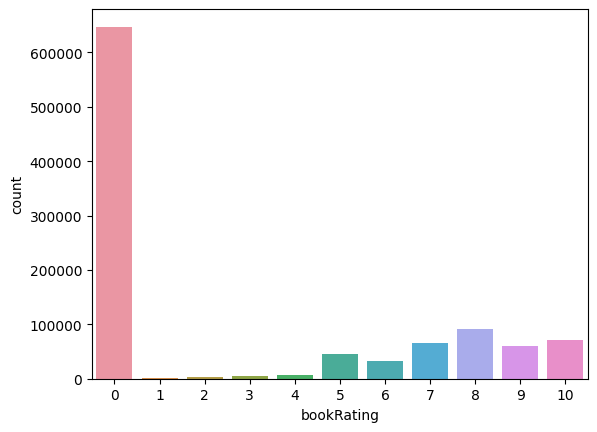

In [ ]:
sns.countplot(data=all_ratings, x='bookRating')
plt.show()

In [ ]:
#Segragating implicit and explict ratings datasets
ratings_explicit = all_ratings[all_ratings.bookRating != 0]
ratings_explicit

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable,Ellis Peters,2001,Editions 10/18,"genève, genève, switzerland",62.0
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


In [ ]:
ratings_implicit = all_ratings[all_ratings.bookRating == 0]
ratings_implicit

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
9,2313,0449912558,0,The Sparrow,MARY DORIA RUSSELL,1997,Fawcett Books,"cincinnati, ohio, usa",23.0
12,2313,0300069049,0,Cosima Wagner's Diaries: An Abridgement,Cosima Wagner,1997,Yale University Press,"cincinnati, ohio, usa",23.0
16,2313,0375706771,0,Midwives: A Novel,Chris Bohjalian,1998,Vintage,"cincinnati, ohio, usa",23.0
21,2313,0451525078,0,Don Quixote of LA Mancha,Miguel de Cervantes Saavedra,1990,Signet Classics,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031120,276047,0747503818,0,Only for a Fortnight: My Life in a Locked Ward,Sue Read,1990,Trafalgar Square,"shoreham-by-sea, , united kingdom",33.0
1031121,276054,0738840459,0,BUZZ,Carrie Lieber,2001,Xlibris Corporation,"novato, california, usa",NaN
1031122,276061,0879977086,0,The Werewolf Principle,Clifford Simak,1982,New Amer Library (Mm),"madrid, n/a, spain",27.0
1031127,276262,0741411504,0,The Bottoms Up of International Development,Richard Saunier,2002,Infinity Publishing (PA),"santa fe, new mexico, usa",68.0


In [ ]:
print ("all_ratings.shape", all_ratings.shape)
print ("ratings_explicit.shape", ratings_explicit.shape)
print ("ratings_implicit.shape", ratings_implicit.shape)

all_ratings.shape (1031136, 9)
ratings_explicit.shape (383842, 9)
ratings_implicit.shape (647294, 9)


In [ ]:
from fastai import *
from fastai.collab import *

In [ ]:
data = CollabDataLoaders.from_df(all_ratings, seed=42, valid_pct=0.1, item_name="bookTitle")
data.show_batch()

,userId,bookTitle,bookRating
0,101550,Estadistica - Schaum 2b: Edicion,7
1,185634,Dying for Chocolate (Culinary Mysteries (Paperback)),0
2,49109,"Hide and Seek (Arthur C. Clarkes Venus Prime, Vol 3)",0
3,266253,Cape Light,8
4,208829,Payment in Blood,0
5,94347,Bridget Jones's Diary,7
6,232945,The Valley of Horses,9
7,165759,The Complete Book of Gold Investing,5
8,71490,The Notebook,7
9,232449,Mama Makes Up Her Mind: And Other Dangers of Southern Living,0


SuggestedLRs(valley=0.10000000149011612)

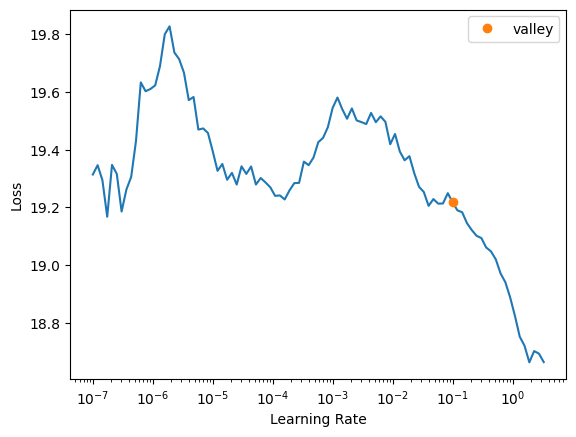

In [ ]:
learn = collab_learner(data, n_factors=20,  y_range=(0.,10.0), wd=1e-1)
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 5e-2)

epoch,train_loss,valid_loss,time
0,14.136160,14.069365,02:08
1,14.327992,14.098003,02:08
2,13.768447,13.790192,02:08
3,13.422456,13.403295,02:10
4,13.038259,13.012361,02:07


In [ ]:
learn.save('/content/drive/MyDrive/Colab Notebooks/all_ratings_fit1')

Path('/content/drive/MyDrive/Colab Notebooks/all_ratings_fit1.pth')

In [ ]:
data = CollabDataLoaders.from_df(ratings_explicit, seed=42, pct_val=0.1, item_name="bookTitle")
data.show_batch()

,userId,bookTitle,bookRating
0,23872,War and Remembrance,6
1,166828,"Phule's Company (Phule's Company, No 1)",9
2,50129,The Hundred Secret Senses,5
3,26535,The Bluestocking on His Knee (Zebra Regency Romance),5
4,62737,Kat Scratch Fever (Kat Colorado Mysteries),6
5,43282,FEMININE FORCE: RELEASE THE POWER WITHIN YOU TO CREATE THE LIFE YOU DESERVE,5
6,25389,No One to Trust,8
7,247129,The Return Journey,6
8,76499,Despair (Vintage International),10
9,245645,The Day of the Storm,10


SuggestedLRs(valley=0.14454397559165955)

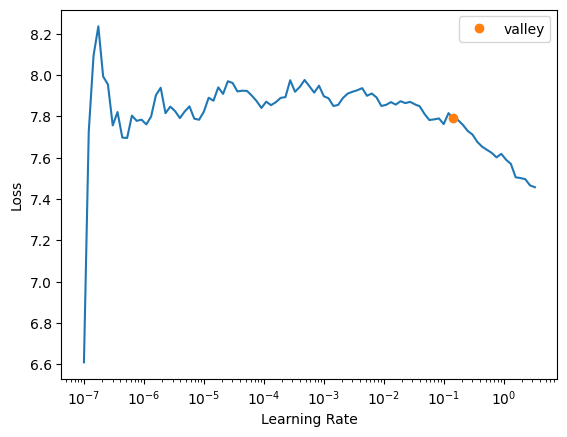

In [ ]:
learn = collab_learner(data, n_factors=20,  y_range=(1.0,10.0), wd=1e-1)
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,4.846821,4.824951,00:39
1,4.329385,4.365232,00:39
2,4.152131,4.300193,00:39
3,3.952866,4.263509,00:41
4,3.506668,4.263445,00:39


In [ ]:
learn.save('/content/drive/MyDrive/Colab Notebooks/ratings_explicit_fit1')

Path('/content/drive/MyDrive/Colab Notebooks/ratings_explicit_fit1.pth')

In [ ]:
learn.load('/content/drive/MyDrive/Colab Notebooks/ratings_explicit_fit1')

In [ ]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(59899, 20)
  (i_weight): Embedding(135568, 20)
  (u_bias): Embedding(59899, 1)
  (i_bias): Embedding(135568, 1)
)

In [ ]:
g = ratings_explicit.groupby(ratings_explicit.bookTitle)['bookRating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books[:10]

array(['The Lovely Bones: A Novel', 'Wild Animus', 'The Da Vinci Code',
       'The Secret Life of Bees', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', "Bridget Jones's Diary",
       'A Painted House', 'Life of Pi',
       'Harry Potter and the Chamber of Secrets (Book 2)'], dtype=object)

In [ ]:
book_bias = learn.bias(top_books, is_item=True)
book_bias.shape

torch.Size([1000])

In [ ]:
mean_ratings = ratings_explicit.groupby(ratings_explicit.bookTitle)['bookRating'].mean()
book_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books, book_bias)]

In [ ]:
item0 = lambda o:o[0]

In [ ]:
sorted(book_ratings, key=item0)[:15]

[(tensor(-0.2724), 'Wild Animus', 4.3907056798623065),
 (tensor(-0.0564), 'Isle of Dogs', 5.433962264150943),
 (tensor(-0.0510), 'Four Blondes', 5.393939393939394),
 (tensor(0.0081), '4 Blondes', 5.653846153846154),
 (tensor(0.0283),
  'Forever... : A Novel of Good and Evil, Love and Hope',
  6.945945945945946),
 (tensor(0.0323), 'Sex &amp; the City', 6.184210526315789),
 (tensor(0.0536), 'The Sky Is Falling', 6.341463414634147),
 (tensor(0.0540),
  "Full Tilt (Janet Evanovich's Full Series)",
  6.568627450980392),
 (tensor(0.0574),
  'Scarlett : The Sequel to Margaret Mitchell\'s \\Gone With the Wind\\""',
  7.0),
 (tensor(0.0582), 'Violin', 6.1063829787234045),
 (tensor(0.0708), 'My Gal Sunday', 6.607843137254902),
 (tensor(0.0738),
  'Portrait of a Killer: Jack the Ripper -- Case Closed',
  6.574468085106383),
 (tensor(0.0797), 'The Voice of the Night', 6.951219512195122),
 (tensor(0.0814), "Dr. Atkins' New Diet Revolution", 6.813953488372093),
 (tensor(0.0827), 'The Cottage', 7.166

In [ ]:
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.8268),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  8.936507936507937),
 (tensor(0.8163), 'The Secret Life of Bees', 8.47783251231527),
 (tensor(0.7875), 'The Lovely Bones: A Novel', 8.185289957567186),
 (tensor(0.7683), 'To Kill a Mockingbird', 8.97752808988764),
 (tensor(0.7601), 'The Da Vinci Code', 8.43927125506073),
 (tensor(0.7457),
  "Ender's Game (Ender Wiggins Saga (Paperback))",
  8.920529801324504),
 (tensor(0.7295), 'A Prayer for Owen Meany', 8.615384615384615),
 (tensor(0.7195),
  'Harry Potter and the Prisoner of Azkaban (Book 3)',
  9.04332129963899),
 (tensor(0.6917),
  "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
  8.588),
 (tensor(0.6763), 'The Red Tent (Bestselling Backlist)', 8.182767624020888),
 (tensor(0.6682),
  "Where the Heart Is (Oprah's Book Club (Paperback))",
  8.142372881355932),
 (tensor(0.6671),
  'Harry Potter and the Chamber of Secrets (Book 2)',
  8.840490797546012),
 (tensor(0.6393

In [ ]:
book_weights = learn.weight(top_books, is_item=True)
book_weights.shape

torch.Size([1000, 20])

In [ ]:
book_pca = book_weights.pca(3)
book_pca.shape

torch.Size([1000, 3])

In [ ]:
fac0,fac1,fac2 = book_pca.t()
book_comp = [(f, i) for f,i in zip(fac0, top_books)]

In [ ]:
from operator import itemgetter

In [ ]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.7717), 'Wild Animus'),
 (tensor(0.9760), 'Isle of Dogs'),
 (tensor(0.7998), '4 Blondes'),
 (tensor(0.7812), 'Portrait of a Killer: Jack the Ripper -- Case Closed'),
 (tensor(0.7371), 'A Patchwork Planet'),
 (tensor(0.7180), 'Four Blondes'),
 (tensor(0.7032), 'Russendisko.'),
 (tensor(0.6945), 'Sex &amp; the City'),
 (tensor(0.6760), 'Slow Waltz in Cedar Bend'),
 (tensor(0.6593), 'How to Be Good')]

In [ ]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-1.4253), 'The Two Towers (The Lord of the Rings, Part 2)'),
 (tensor(-1.3211), 'The Return of the King (The Lord of the Rings, Part 3)'),
 (tensor(-1.2823), 'Harry Potter and the Goblet of Fire (Book 4)'),
 (tensor(-1.2273),
  'The Hobbit : The Enchanting Prelude to The Lord of the Rings'),
 (tensor(-1.2263),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"),
 (tensor(-1.1390),
  'The Fellowship of the Ring (The Lord of the Rings, Part 1)'),
 (tensor(-1.0658), "Ender's Game (Ender Wiggins Saga (Paperback))"),
 (tensor(-1.0040), 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
 (tensor(-0.9638), "Harry Potter and the Sorcerer's Stone (Book 1)"),
 (tensor(-0.9025), 'Fahrenheit 451')]

In [ ]:
book_comp = [(f, i) for f,i in zip(fac1, top_books)]

In [ ]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7291), 'The Catcher in the Rye'),
 (tensor(0.6947), 'Wild Animus'),
 (tensor(0.6664), 'Life of Pi'),
 (tensor(0.6619), "Ender's Game (Ender Wiggins Saga (Paperback))"),
 (tensor(0.6410), 'The Amazing Adventures of Kavalier &amp; Clay'),
 (tensor(0.5883), 'The Virgin Suicides'),
 (tensor(0.5780),
  'A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail)'),
 (tensor(0.5390),
  "The No. 1 Ladies' Detective Agency (Today Show Book Club #8)"),
 (tensor(0.5151), "Bridget Jones's Diary"),
 (tensor(0.5141), 'Fahrenheit 451')]

In [ ]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-0.7800),
  "Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)"),
 (tensor(-0.7570), 'The Lovely Bones: A Novel'),
 (tensor(-0.7249), "Suzanne's Diary for Nicholas"),
 (tensor(-0.7232), 'The Rescue'),
 (tensor(-0.6862), 'The Notebook'),
 (tensor(-0.6723),
  'Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2)'),
 (tensor(-0.5598), 'Message in a Bottle'),
 (tensor(-0.5100), 'The Bridges of Madison County'),
 (tensor(-0.5025), 'The Horse Whisperer'),
 (tensor(-0.4936), 'Ishmael: An Adventure of the Mind and Spirit')]

In [ ]:
book_comp = [(f, i) for f,i in zip(fac2, top_books)]

In [ ]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.5490),
  'Into Thin Air : A Personal Account of the Mt. Everest Disaster'),
 (tensor(0.5359), 'The Joy Luck Club'),
 (tensor(0.5351), 'The Giver (21st Century Reference)'),
 (tensor(0.4949), "She's Come Undone (Oprah's Book Club (Paperback))"),
 (tensor(0.4629), 'A Heartbreaking Work of Staggering Genius'),
 (tensor(0.4352), "Bridget Jones's Diary"),
 (tensor(0.4339), 'Misery'),
 (tensor(0.4245), 'Black House'),
 (tensor(0.4188), 'Bridget Jones: The Edge of Reason'),
 (tensor(0.4008), "Everything's Eventual : 14 Dark Tales")]

In [ ]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-0.9292), 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
 (tensor(-0.6627), 'Harry Potter and the Chamber of Secrets (Book 2)'),
 (tensor(-0.6427), "Harry Potter and the Sorcerer's Stone (Book 1)"),
 (tensor(-0.6301),
  'The Hobbit : The Enchanting Prelude to The Lord of the Rings'),
 (tensor(-0.5884), 'Harry Potter and the Order of the Phoenix (Book 5)'),
 (tensor(-0.5761), 'The Client'),
 (tensor(-0.5473), 'Harry Potter and the Goblet of Fire (Book 4)'),
 (tensor(-0.5006), 'The Chamber'),
 (tensor(-0.4831), 'Nine Stories'),
 (tensor(-0.4827), 'The Da Vinci Code')]